In [9]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

import models
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+500e3
ra = constants.Re+501e3
Omega = 30*np.pi/180
i = 10*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = models.Cubesat("3U")
thruster = models.Thruster(thrust=10e-2,isp=720)
satellite.thruster = thruster
# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("thrust")
%time maneuvers.propagate2(60*60*15)
maneuvers.removePerturbation("thrust")
maneuvers.propagate2(60*60*24*2)

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  1.625
Wall time: 300 ms
Propagating...from day  1.625  to  3.625


<IPython.core.display.Javascript object>


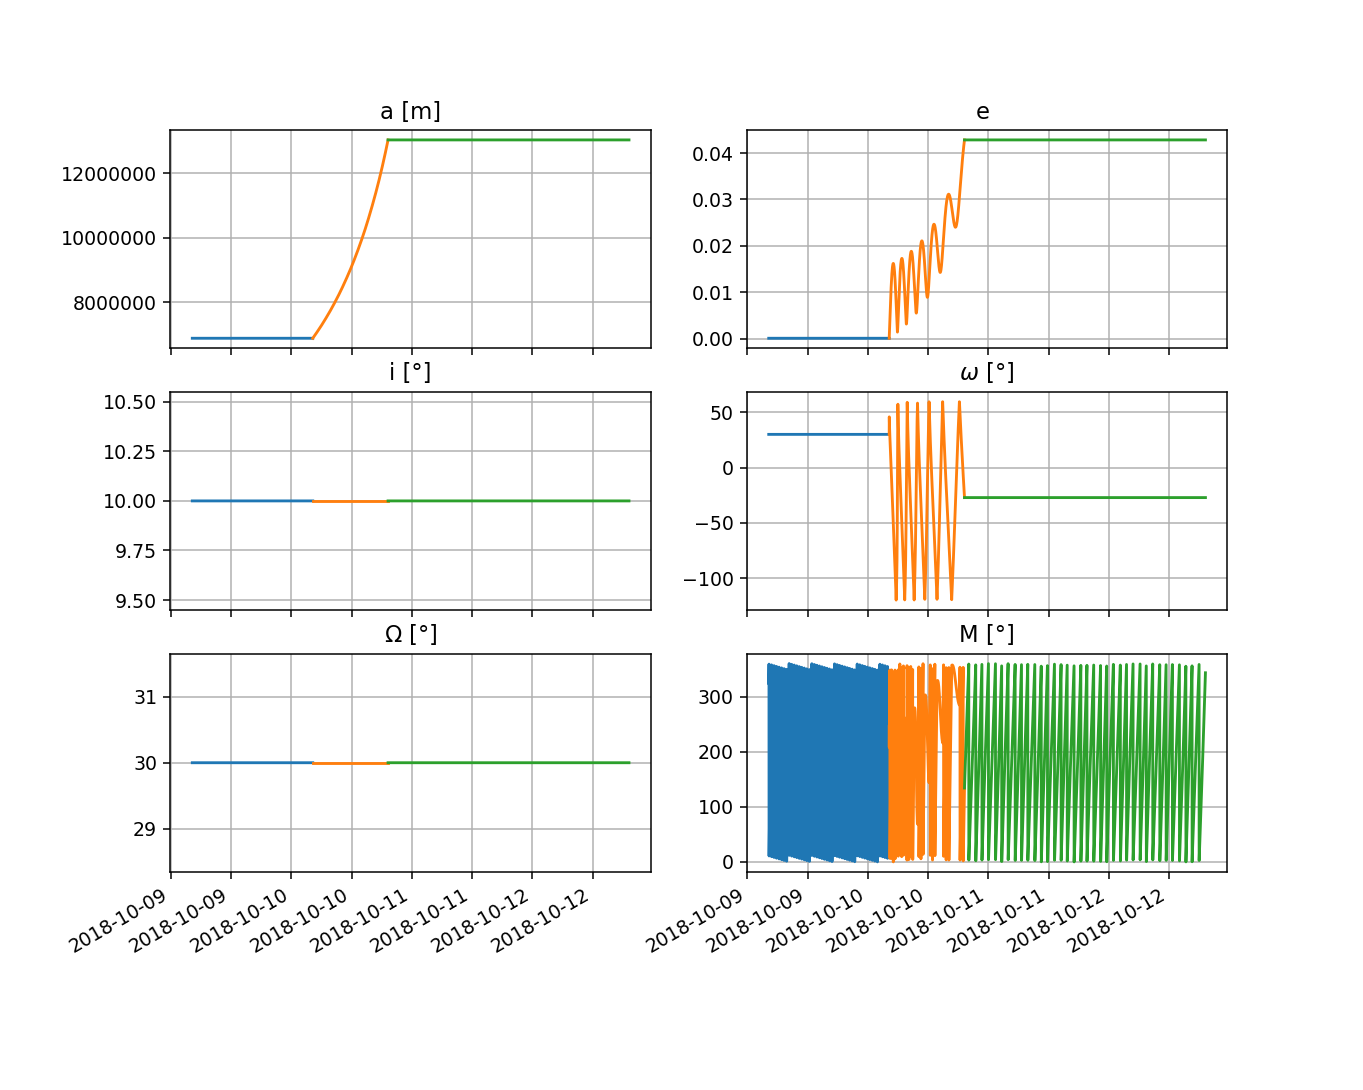

In [15]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
maneuvers.plot("com")

<IPython.core.display.Javascript object>


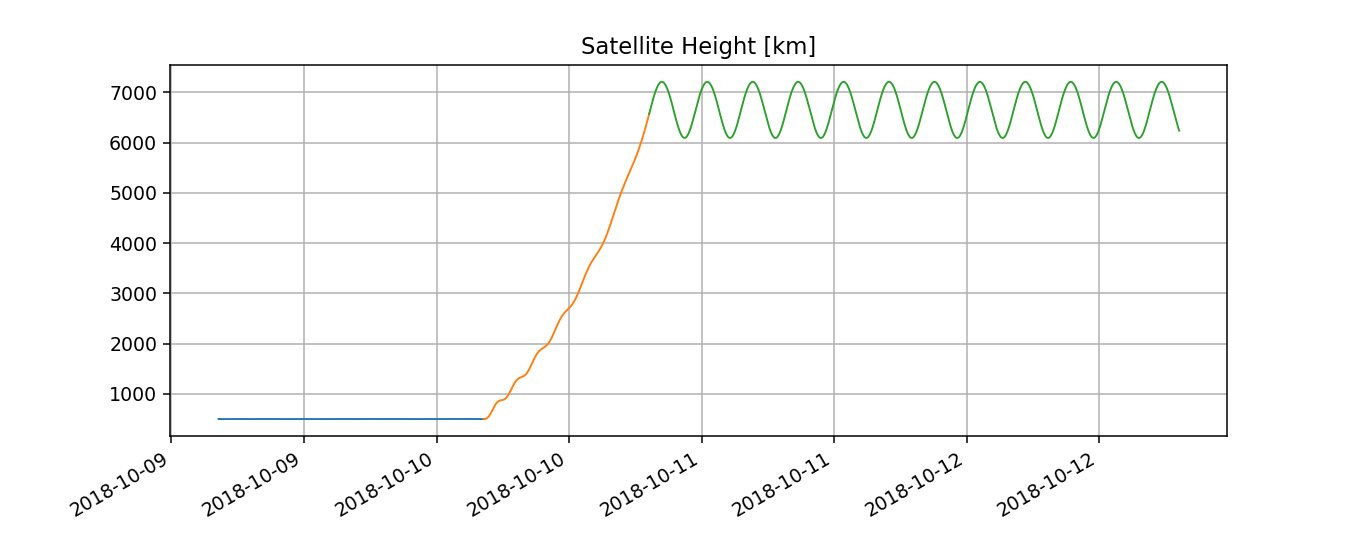

<IPython.core.display.Javascript object>


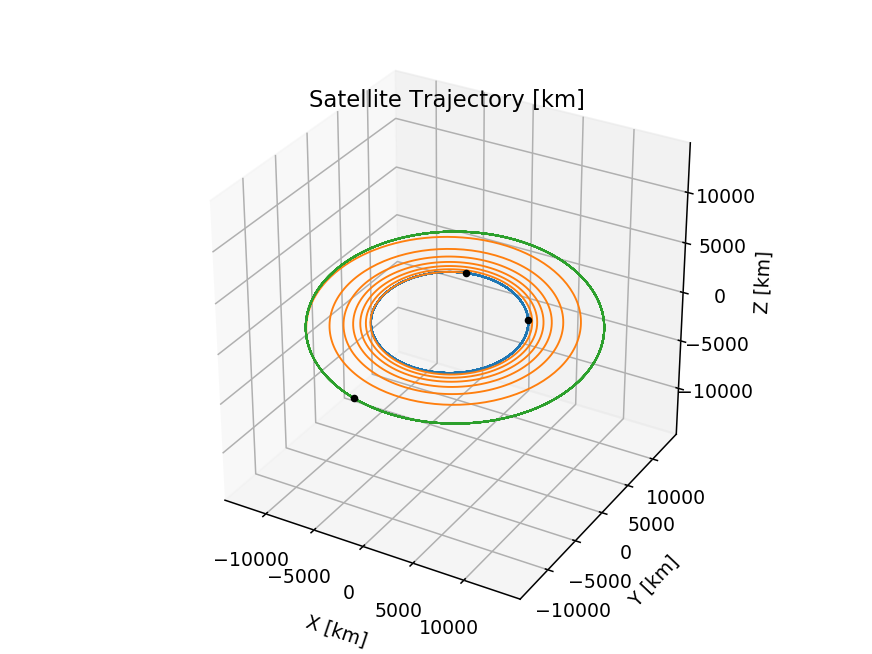

<IPython.core.display.Javascript object>


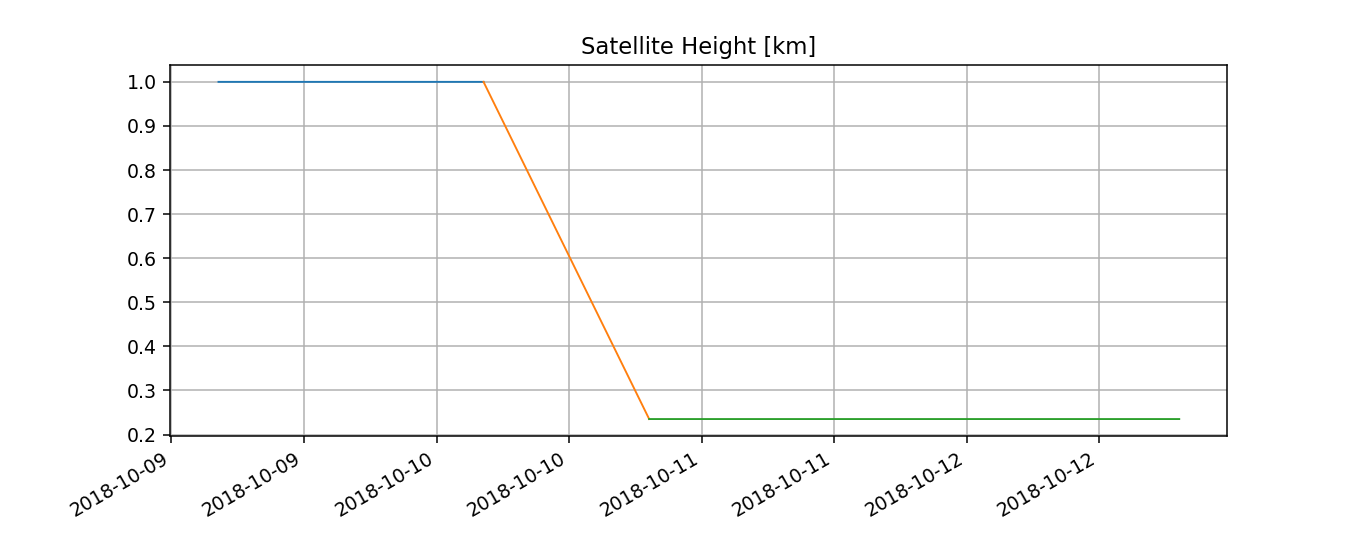

In [16]:
#Plot Height
maneuvers.plot("singleItem", (np.linalg.norm(maneuvers.history.r,axis=1)-constants.Re)/1000)
maneuvers.plot("3d-trajectory")
maneuvers.plot("singleItem", maneuvers.history.propMass)